<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Tarea_Cranck_NicolsonEDPII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Crank–Nicolson para la ecuación del calor
En este cuaderno se va a resolver la ecuación de calor unidimnesional mediante el método iterativo, posteriormente se mostrará una tabla de resultados de las iteraciones llevadas a cabo para distintos valores de t.

## Planteamiento del problema
El problema a resolver es el siguiente:

$$ u_t = u_{xx}, \quad 0 < x < 1, \; t>0 $$

Sujeto a:
- Condiciones de frontera:  
  $$ u(0,t)=0,\quad u(1,t)=0 $$
- Condición inicial:  
  $$ u(x,0)=1 - 4(x-1/2)^2 $$

## Resolución mediante método de Crank–Nicolson
A continuación se mostrarán los códigos comentados para la resolución mediante Crank-Nicolson.

In [6]:
# Importación de librerías
# Numpy y Sympy para el calculo numérico, tabulate para la tabla que guardará los resultados iterativos y Matplotlib para la gráfica.
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt


In [3]:
# Parámetros del problema
h = 0.1 # tamaño de paso en x.
k = 0.01 # tamaño de paso en t.
r = k / (h**2) # calculo del factor de estabilidad.

# Aquí definimos los arreglos que contendran los valores de la malla.
x = np.arange(0, 1+h, h)
t = np.arange(0, 0.1001, k)

# Definimos funciones para cada condición dada.
u = np.zeros((len(t), len(x)))
u[0,:] = 1 - 4*(x - 0.5)**2
u[0,0] = 0
u[0,-1] = 0

# Construimos el sistema matricial A u^{n+1} = B u^n clásico para resolver estos ejercicios.
N = len(x)-2
A = sp.zeros(N)
B = sp.zeros(N)

for i in range(N):
    for j in range(N):
        if i == j:
            A[i,j] = 1 + r
            B[i,j] = 1 - r
        elif abs(i-j)==1:
            A[i,j] = -r/2
            B[i,j] = r/2

# Lo guardamos en un par de matrices que serán las matrices a optimizar.
A = sp.Matrix(A)
B = sp.Matrix(B)

# Por último, el ciclo que se encarga de resolver el sistemas con las mismas funciones vistas en la tarea anterior.
for n in range(len(t)-1):
    b = B*sp.Matrix(u[n,1:-1])
    sol = A.LUsolve(b)
    u[n+1,1:-1] = np.array(sol, dtype=float).flatten()


In [4]:
# Creamos el entorno para la tabla que mostrará los datos de la solución.
indices_t = [0,1,2,3,4,5,10]
table = []

# Ciclo que ajusta el número de filas y columnas en base a la dimensión del arreglo x y t.
for ti in indices_t:
    row = [ti*k] + list(u[ti, :6])
    table.append(row)

# Nombramos cada columna con los datos a mostrar e imprimimos.
headers = ["t","x=0","0.1","0.2","0.3","0.4","0.5"]
print(tabulate(table, headers=headers))

   t    x=0       0.1       0.2       0.3       0.4       0.5
----  -----  --------  --------  --------  --------  --------
0         0  0.36      0.64      0.84      0.96      1
0.01      0  0.301436  0.565746  0.761547  0.880442  0.920221
0.02      0  0.26763   0.504776  0.688489  0.802994  0.841718
0.03      0  0.23989   0.454784  0.623126  0.729952  0.766473
0.04      0  0.21645   0.411015  0.564592  0.662619  0.696285
0.05      0  0.195788  0.372138  0.511722  0.601117  0.631868
0.1       0  0.119736  0.227748  0.313462  0.368491  0.387452


## Sección para comparar con la solución real y mostrar el error de aproximación.
Usando la informacion de la solución real proporcionada por la imagen:

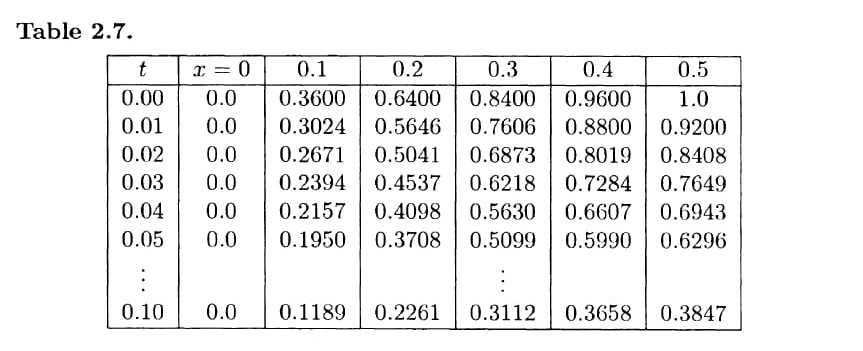

Comparamos y graficamos la diferencia.

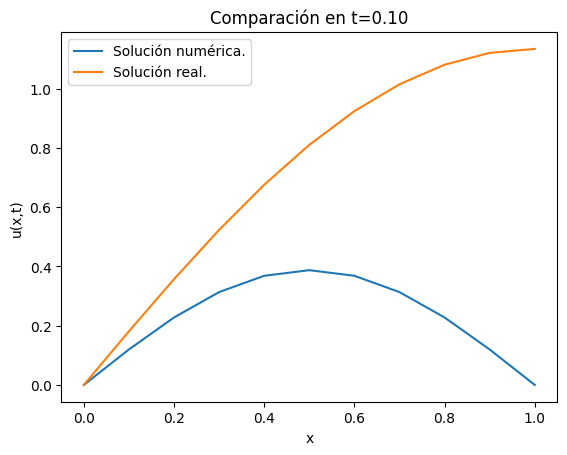

Error máximo: 1.3987925328353514


In [7]:
# Solución analítica mediante un ciclo.
def u_real(x,t,terms=100):
    s=0
    for n in range(terms):
        lam = (2*n+1)*np.pi/2
        coef = 8/(lam**3)*np.sin(lam/2)
        s += coef*np.sin(lam*x)*np.exp(-lam**2 * t)
    return s

u_true = np.zeros_like(u)
for i in range(len(t)):
    for j in range(len(x)):
        u_true[i,j] = u_real(x[j], t[i])

# Calculo del error.
error = np.abs(u - u_true)

# Graficación de la comparación.
plt.plot(x, u[10], label='Solución numérica.')
plt.plot(x, u_true[10], label='Solución real.')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Comparación en t=0.10')
plt.show()

print(f"Error máximo: {np.max(error)}")